In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [ ]:
#creating the input variables for each kinetic plots
Ce=[i for i in range(90+1)]

In [ ]:
def time_set(t_end=60,t_steps=10):
  t_step = t_end/t_steps;
  tt=list(np.arange(0,t_end+1,t_step))
  return tt

In [ ]:
def qe_Fre(KF,Ce,n):
  qe=[0 for _ in range(len(Ce))]
  for i in range(len(Ce)):
    qe[i]=KF*(Ce[i]**(1/n))
  return qe


In [ ]:
def qe_Lan(Qmax,KL,Ce):
  qe=[0 for _ in range(len(Ce))]
  for i in range(len(Ce)):
    qe[i]=(Qmax*KL*Ce[i])/(1+KL*Ce[i])
  return qe

In [ ]:
def log_qe_qt (qe,tt,k1=0.083):
  result=[0 for _ in range(len(tt))]
  for i in range(len(tt)):
    result[i]=math.log(qe)-(k1/2.303)*tt[i]
  return result


In [ ]:
def t_qt (qe,tt,k2=0.009):
  result=[0 for _ in range(len(tt))]
  for i in range(len(tt)):
    result[i]=(1/(k2*qe**2))+((1/qe)*tt[i])
  return result

In [ ]:
def DiffEq(conditions,t,qe,k1,k2):
  
  time=t
 
  Ct=conditions[0]
  qt=conditions[1]

  j = exp[0,2];
  Cinfluent = exp[0,3];
  k = exp[0,4];
  Cs = exp[0,5];
  KF = exp[0,6];
  n = exp[0,7];

  
  Ct_mgL = Ct/1    #mg L-1
  qt_mgg = qt/(Cs*1)    #mg g-1
  
  
  dCdt=[0,0,0,0]
 
  #calculate dq/dt in ppb L-1 min-1
  rate_ads_first_fixed=k1*(qe-qt_mgg)

  rate_ads_second_fixed=k2*(qe-qt_mgg)**2

  rate_ads_second_mod = 1*k*Ct_mgL*Cs* (1-(qt_mgg/(KF*(Ct_mgL**(1/n)))))**2


  
  #calculate the rate of sorbate influx (continuous-flow systems only)
  rate_influx = j*Cinfluent
  #calculate the rate of sorbate outflux (continuous-flow systems only)
  rate_outflux = j*Ct 

  dCdt[0]=-rate_ads_second_mod+rate_influx-rate_outflux
  dCdt[1] = rate_ads_first_fixed    #pseudo-first order (fixed qe)

  dCdt[2]=rate_ads_second_fixed      #pseudo-second order (fixed qe)
  dCdt[3]=rate_ads_second_mod/1*Cs     #pseudo-second order 
  
  return dCdt

In [ ]:
def result_processing (Cs,tt,C_init,qe=16.7,k1=0.083,k2=0.009,
                       number_of_experiments=1,number_of_variables=8,q_init=0,j=0,Cinfluent=0,KF=5.1,n=2.63,k=0.09):
  results_table=[0]*number_of_experiments

  results_t=np.zeros((number_of_experiments,len(tt)))
  results_bv=np.zeros((number_of_experiments,len(tt)))
  results_Ct=np.zeros((number_of_experiments,len(tt)))
  results_qt_1=np.zeros((number_of_experiments,len(tt)))
  results_qt_2=np.zeros((number_of_experiments,len(tt)))
  results_qt_mod=np.zeros((number_of_experiments,len(tt)))
  experiments = np.zeros((number_of_experiments,number_of_variables)) 
  for i in range(number_of_experiments) :
    experiments[i,0] = C_init;
    experiments[i,1] = q_init;
    experiments[i,2] = j;
    experiments[i,3] = Cinfluent;
    experiments[i,4] = k;
    experiments[i,5] = Cs; #exponentially increasing sorbent concentration
    experiments[i,6] = KF;
    experiments[i,7] = n;   

  for i in range(number_of_experiments):
    global exp 
    exp = np.zeros((1,number_of_variables));  
    exp[0,:] = experiments[i,:]
    exp_C_init = exp[0,0]
    exp_q_init = exp[0,1]
   
    result = odeint(DiffEq,[exp_C_init,exp_q_init,0,0],tt,args=(qe,k1,k2))
    
    results_t[i,:] = tt;
    results_bv[i,:] = results_t[0,:]*exp[0,2];
    results_Ct[i,:] = result[:,0]
    results_qt_1[i,:] = result[:,1]
    results_qt_2[i,:]= result[:,2]
    results_qt_mod[i,:]= result[:,3]

    results_table[i] = [results_t[i,:],results_Ct[i,:],results_qt_1[i,:],results_qt_2[i,:],results_qt_mod[i,:]]
  return results_table

In [ ]:
tt=time_set()

results_table=result_processing(1,tt,36)

In [ ]:
qe=qe_Fre(5.1,results_table[0][1],2.63)
qe_fix=[min(qe)]*len(tt)
result_t_qt=t_qt (17.6,tt)
result_log=log_qe_qt(17.6,tt)

In [ ]:
qe_Fr_5=qe_Fre(8.47,Ce,3.94)
qe_la_5=qe_Lan(29.44,0.18,Ce)
qe_Fr_7=qe_Fre(4.06,Ce,2.63)
qe_la_7=qe_Lan(22.64,0.08,Ce)
qe_Fr_9=qe_Fre(2.46,Ce,2.18)
qe_la_9=qe_Lan(21.60,0.05,Ce)

<Figure size 432x288 with 0 Axes>

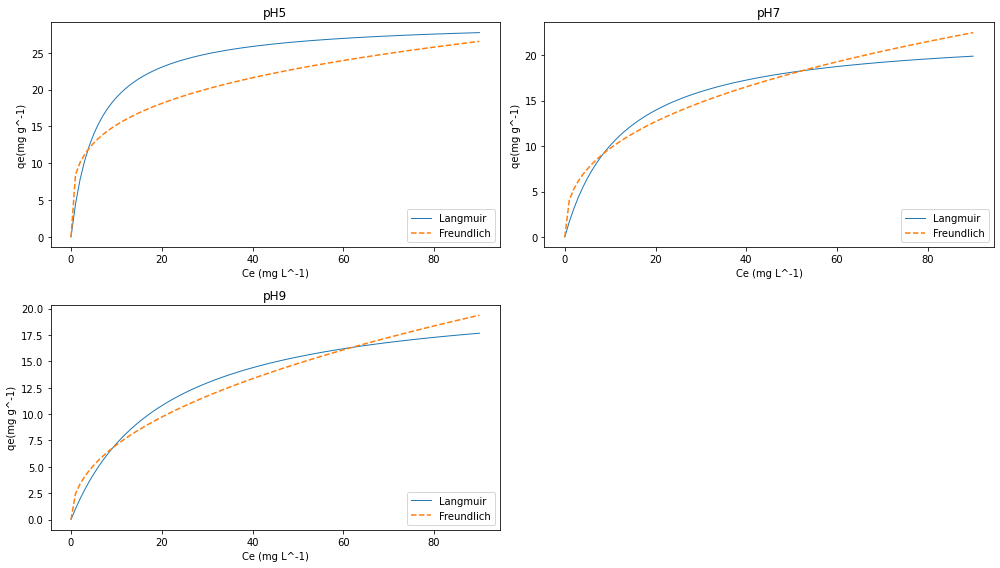

In [ ]:
plt.figure()
plt.subplots( figsize=(14, 8))
plt.subplot(2, 2, 1)

lines = plt.plot(Ce,qe_la_5,qe_Fr_5)
plt.xlabel("Ce (mg L^-1)")
plt.ylabel("qe(mg g^-1)")
plt.setp(lines[0], linewidth=1)  
plt.setp(lines[1], linestyle='--')   
plt.legend(('Langmuir', 'Freundlich'), loc='lower right')  
plt.title('pH5')  

plt.subplot(2, 2, 2)
lines=plt.plot(Ce,qe_la_7,qe_Fr_7)
plt.xlabel("Ce (mg L^-1)")
plt.ylabel("qe(mg g^-1)")
plt.setp(lines[0], linewidth=1)  
plt.setp(lines[1], linestyle='--')   
plt.legend(('Langmuir', 'Freundlich'), loc='lower right')  
plt.title('pH7')  

plt.subplot(2, 2, 3)
lines=plt.plot(Ce,qe_la_9,qe_Fr_9)
plt.xlabel("Ce (mg L^-1)")
plt.ylabel("qe(mg g^-1)")
plt.setp(lines[0], linewidth=1)  
plt.setp(lines[1], linestyle='--')   
plt.legend(('Langmuir', 'Freundlich'), loc='lower right')  
plt.title('pH9')  

plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

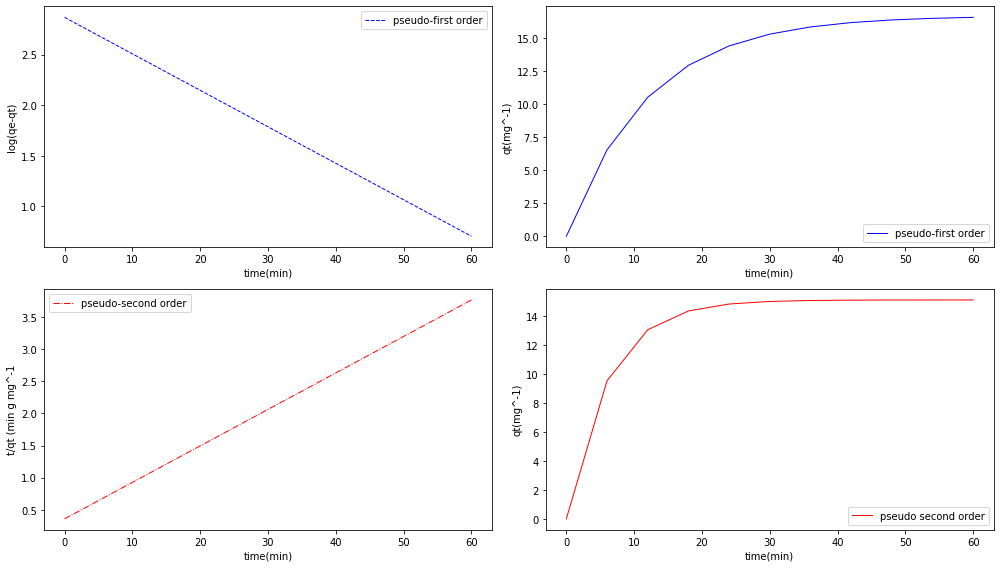

In [ ]:
plt.figure()
plt.subplots( figsize=(14, 8))
plt.subplot(2, 2, 1)

lines = plt.plot( results_table[0][0],result_log,color='b')
plt.xlabel("time(min)")
plt.ylabel("log(qe-qt)")
plt.setp(lines[0], linewidth=1)  
plt.setp(lines[0], linestyle='--')   
plt.legend(('pseudo-first order',), loc='upper right')  
  

plt.subplot(2, 2, 2)
lines=plt.plot( results_table[0][0],results_table[0][2],color='b')
plt.xlabel("time(min)")
plt.ylabel("qt(mg^-1)")
plt.setp(lines[0], linewidth=1)   
plt.legend(('pseudo-first order',), loc='lower right')  
 

plt.subplot(2, 2, 3)
lines=plt.plot( results_table[0][0],result_t_qt,color='r')
plt.xlabel("time(min)")
plt.ylabel("t/qt (min g mg^-1")
plt.setp(lines[0], linewidth=1)  
plt.setp(lines[0], linestyle='-.')   
plt.legend(('pseudo-second order',), loc='upper left')  


plt.subplot(2, 2, 4)
lines=plt.plot( results_table[0][0],results_table[0][3],color='r')
plt.xlabel("time(min)")
plt.ylabel("qt(mg^-1)")
plt.setp(lines[0], linewidth=1)  
plt.setp(lines[0], linestyle='-')   
plt.legend(('pseudo second order',), loc='lower right')  
  

plt.tight_layout()
plt.show()


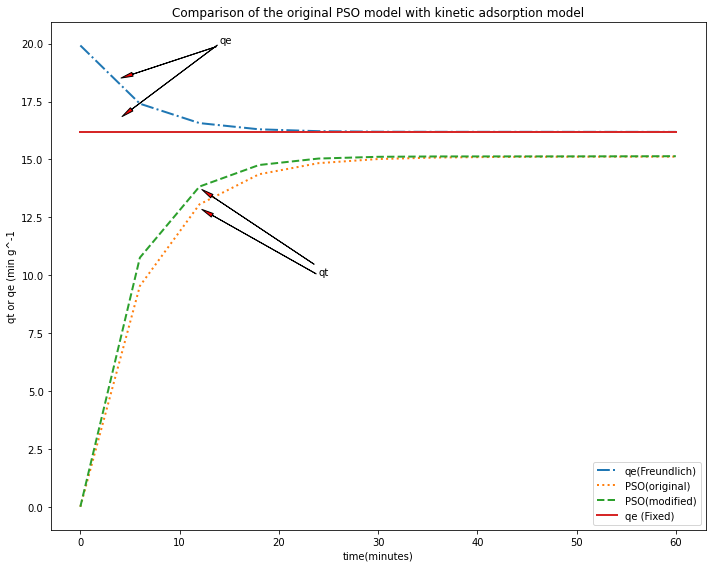

In [ ]:
plt.figure(figsize=(10, 8))
lines=plt.plot( results_table[0][0],qe,results_table[0][0],results_table[0][3],results_table[0][0],results_table[0][4],results_table[0][0],qe_fix)
plt.xlabel("time(minutes)")
plt.ylabel("qt or qe (min g^-1")
plt.setp(lines[0], linewidth=2,linestyle='-.')  
plt.setp(lines[1], linewidth=2,linestyle=':') 
plt.setp(lines[2], linewidth=2,linestyle='--') 
plt.setp(lines[-1], linewidth=2,linestyle='-') 
plt.legend(("qe(Freundlich)",'PSO(original)',"PSO(modified)","qe (Fixed)"), loc='lower right')
plt.title('Comparison of the original PSO model with kinetic adsorption model')

plt.annotate('qe',weight='medium', xy=(4,18.5), xytext=(14, 20),
            arrowprops=dict(facecolor='red', shrink=0.01,width=0.01,headwidth=4),
            )
plt.annotate('',weight='medium', xy=(4,16.785412811271282), xytext=(14, 20),
            arrowprops=dict(facecolor='red', shrink=0.02,width=0.01,headwidth=4),
            )

plt.annotate('qt',weight='medium', xy=(12,13.77), xytext=(24, 10),
            arrowprops=dict(facecolor='red', shrink=0.02,width=0.01,headwidth=4),
            )
plt.annotate('',weight='medium', xy=(12,12.9), xytext=(24, 10),
            arrowprops=dict(facecolor='red', shrink=0.02,width=0.01,headwidth=4),
            )
plt.tight_layout()
plt.show()

In [ ]:
tt1=time_set(1000,100)
results_table_001_5=result_processing(0.01,tt1,500)
results_table_01_5=result_processing(0.1,tt1,500)
results_table_02_5=result_processing(0.2,tt1,500)
results_table_05_5=result_processing(0.5,tt1,500)
results_table_1_5=result_processing(1,tt1,500)
results_table_2_5=result_processing(2,tt1,500)
treatment_001_5=results_table_001_5[0][1]/500
treatment_01_5=results_table_01_5[0][1]/500
treatment_02_5=results_table_02_5[0][1]/500
treatment_05_5=results_table_05_5[0][1]/500
treatment_1_5=results_table_1_5[0][1]/500
treatment_2_5=results_table_2_5[0][1]/500


results_table_001_1=result_processing(0.01,tt1,1000)
results_table_01_1=result_processing(0.1,tt1,1000)
results_table_02_1=result_processing(0.2,tt1,1000)
results_table_05_1=result_processing(0.5,tt1,1000)
results_table_1_1=result_processing(1,tt1,1000)
results_table_2_1=result_processing(2,tt1,1000)
treatment_001_1=results_table_001_1[0][1]/1000
treatment_01_1=results_table_01_1[0][1]/1000
treatment_02_1=results_table_02_1[0][1]/1000
treatment_05_1=results_table_05_1[0][1]/1000
treatment_1_1=results_table_1_1[0][1]/1000
treatment_2_1=results_table_2_1[0][1]/1000


results_table_001_2=result_processing(0.01,tt1,2000)
results_table_01_2=result_processing(0.1,tt1,2000)
results_table_02_2=result_processing(0.2,tt1,2000)
results_table_05_2=result_processing(0.5,tt1,2000)
results_table_1_2=result_processing(1,tt1,2000)
results_table_2_2=result_processing(2,tt1,2000)
treatment_001_2=results_table_001_2[0][1]/2000
treatment_01_2=results_table_01_2[0][1]/2000
treatment_02_2=results_table_02_2[0][1]/2000
treatment_05_2=results_table_05_2[0][1]/2000
treatment_1_2=results_table_1_2[0][1]/2000
treatment_2_2=results_table_2_2[0][1]/2000


<Figure size 432x288 with 0 Axes>

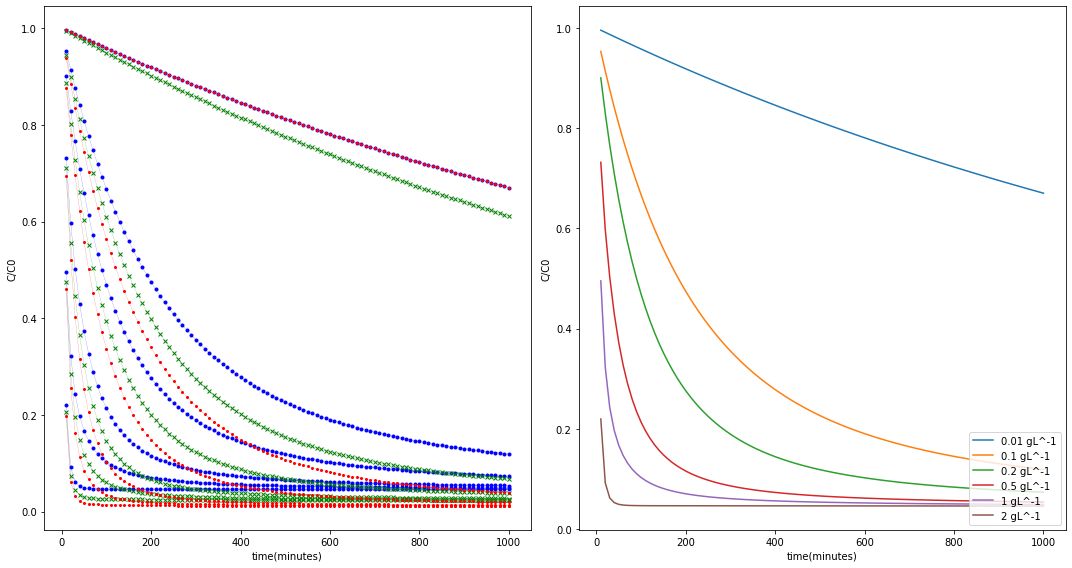

In [ ]:
plt.figure()
plt.subplots( figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.xlabel("time(minutes)")
plt.ylabel("C/C0")
plt.plot( tt1[1:],treatment_001_5[1:],
         tt1[1:],treatment_01_5[1:],
         tt1[1:],treatment_02_5[1:],
         tt1[1:],treatment_05_5[1:],
         tt1[1:],treatment_1_5[1:],
         tt1[1:],treatment_2_5[1:],color='b',marker='o',markersize=3,linestyle='dashed',linewidth = 0.2
        
         
         )


plt.plot( tt1[1:],treatment_001_1[1:],
         tt1[1:],treatment_01_1[1:],
         tt1[1:],treatment_02_1[1:],
         tt1[1:],treatment_05_1[1:],
         tt1[1:],treatment_1_1[1:],
         tt1[1:],treatment_2_1[1:],color='g',marker="x",markersize=4,linestyle='dashed',linewidth = 0.2
        
         
         )


plt.plot( tt1[1:],treatment_001_5[1:],
         tt1[1:],treatment_01_2[1:],
         tt1[1:],treatment_02_2[1:],
         tt1[1:],treatment_05_2[1:],
         tt1[1:],treatment_1_2[1:],
         tt1[1:],treatment_2_2[1:],color='r',marker='.',markersize=4,linestyle='dashed',linewidth = 0.2
        
         
         )



plt.subplot(1, 2, 2)
plt.xlabel("time(minutes)")
plt.ylabel("C/C0")
plt.plot( tt1[1:],treatment_001_5[1:],
         tt1[1:],treatment_01_5[1:],
         tt1[1:],treatment_02_5[1:],
         tt1[1:],treatment_05_5[1:],
         tt1[1:],treatment_1_5[1:],
         tt1[1:],treatment_2_5[1:]
        
         
         )


plt.legend(('0.01 gL^-1','0.1 gL^-1','0.2 gL^-1','0.5 gL^-1','1 gL^-1','2 gL^-1'), loc='lower right')
plt.tight_layout()
plt.show()